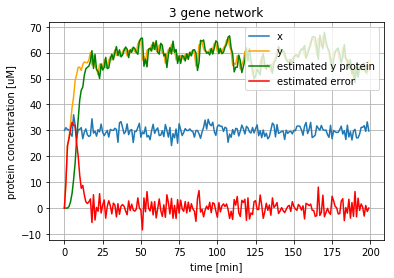

In [41]:
import matplotlib.pyplot as plt
import random
import numpy as np

mu = 0                   # mean = 0
sigma = 1                # SD = 1
N = 200                  # total number of data points
X = 30                   # constant x protein concentration
x = [X]*N                # x protein concentration (uM)
y = [0]*N                # y protein concentration (uM)
pXY = 0.4                # production parameter
pY = 0.8                 # degradation/dilution parameter

n = np.arange(0, N, 1)
m = np.arange(0, N-1, 1)

for i in range(1, N):
    x[i] = X + 2*random.gauss(mu, sigma)
    y[i] = pXY*x[i-1] + pY*y[i-1] + 2*random.gauss(mu, sigma)

# adaptive parameter estimation (Least Mean Squares (LMS) method)
est_pXY = [0]*N           # estimated production parameter set
est_pY = [0]*N            # estimated degradation/dilution parameter set
est_y = [0]               # y protein concentration (uM)
error = [0]*N             # estimation error (y - est_y)
u = 0.0001;               # step size

for i in range(1, N-1):
    est_y.append(est_pXY[i]*x[i-1] + est_pY[i]*y[i-1])
    error[i] = y[i]-est_y[i];
    est_pXY[i] = est_pXY[i] + u*x[i-1]*error[i];
    est_pY[i+1] = est_pY[i] + u*y[i-1]*error[i];

plt.plot(n, x,label = 'x')
plt.plot(n, y,'orange',label = 'y')
plt.plot(m, est_y, 'g',label = 'estimated y protein')
plt.plot(n, error, 'r',label = 'estimated error')
plt.xlabel('time [min]')
plt.ylabel('protein concentration [uM]')
plt.legend(loc='upper right')
plt.title('3 gene network')
plt.grid(True)
plt.show()